## Content:

**Explanation of UseCase:**

- AT&T Churn Prediction introduction
- Dataset downloand and read

**Intro to LogisticRegression:**

- Recap of Linear Regression
  - Quiz 6
- Definition

**Thresholding and Step function:**

- Definition
  - Quiz 7
- Problem with step function

**Sigmoid function**

- Plot and mathematical definition
  - Quiz 8
- Thresholding
  - Quiz 9
- Properties
  - [Logistic Everywhere](https://www.scaler.com/hire/test/problem/23570/)

**Geometric Interpretation**

- [Functions](https://www.scaler.com/hire/test/problem/17739/)
- [Have some Sigmoid](https://www.scaler.com/hire/test/problem/20340/)
- [Feature Scaling](https://www.scaler.com/hire/test/problem/16365/)
- [Logistic Seperable](https://www.scaler.com/hire/test/problem/logistic-seperable/)
  - Quiz 10
  - Quiz 11

**Implementation**

- [Logistic Sigmoid function](https://www.scaler.com/hire/test/problem/16210/)

**MLE(Maximum Log Likelihood)**

**LogLoss and Optimization**

- [Log loss for individual class](https://www.scaler.com/hire/test/problem/16070/) (hold)
- [Tumor Eradication](https://www.scaler.com/hire/test/problem/17738/)
- [Log Loss Diagram](https://www.scaler.com/hire/test/problem/16071/)
- [Log loss and derivative](https://www.scaler.com/hire/test/problem/23467/)

- [Logistic Hyperparameters](https://www.scaler.com/hire/test/problem/20191/)
- [What's the threshold?](https://www.scaler.com/hire/test/problem/23539/)
- [Logistic Boundary](https://www.scaler.com/hire/test/problem/23569/)
- [Training and testing errors](https://www.scaler.com/hire/test/problem/23429/)
- [Train and predict](https://www.scaler.com/hire/test/problem/23465/)

  - Quiz 12
  - Quiz 13

- Sklearn implementation of logistic regression
- Accuracy Metric
  - [Metrics-Accuracy](https://www.scaler.com/hire/test/problem/16549/)


#### Let's start with our usecase for today!


## Introduction to AT&T Churn UseCase


AT & T, one of the leading telecommunications companies of USA, faces the challenge of customer churn, where customers switch to competitors due to issues such as bad network, poor customer service, and so on.

As a Data Scientist, you are tasked to develop a machine learning model to predict whether a customer will be churned or not, based on various parameters, such as state, number of evening calls, number of day calls, etc.


![image](./extra/lr0.jpg)


Let's look at the data


In [ ]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 41.3MB/s]


In [ ]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [ ]:
churn['Churn'].value_counts()

,count
Churn,
0,2850
1,2850


Observe:

- The number of values are same for both "0" and "1"


## Intro to Logistic Regression


Before we dive into logistic regression, let's look at few notations we will be following.


![image](./extra/lr0.jpg)


In [3]:
import gdown
urls = ["https://drive.google.com/uc?id=1pTa9eEfBDm2skQ3vr1Amqi6wW2HnGyKU" , "https://drive.google.com/uc?id=1s4SdcSheLcViqsjRuxxdAwqigZFmUidm", 'https://drive.google.com/uc?id=1bOkRRCQxFZWlz8jixyKoWzRaAZZAHvZI' , 'https://drive.google.com/uc?id=124-1Tf8ryqdJ6juGC_LiBH_JhvdGClOP' , 'https://drive.google.com/uc?id=19HGBijpRBvBKhcRVoUJgT_z1TIy_NI5C' , 'https://drive.google.com/uc?id=1-8Hp5n0GNA3b2KqADsxutQa2-rGwCkiz' , 'https://drive.google.com/uc?id=1WPvn9KIGBJ7ps7JK19-veZ2SP_YYjazB' , 'https://drive.google.com/uc?id=1frXs5fjcbpwiVAdXAe3IbYynrqumyhF-','https://drive.google.com/uc?id=1Cw1zMLNH36zjATwLP_HINCvU1L3uJnS1' ,  'https://drive.google.com/uc?id=1Qsrn2KH5Q32Q-JfdfOFdLnNsx9v6zg-n',
'https://drive.google.com/uc?id=1CNCz14Ifptsa_wvu3QLL-XkbndhO8Wl5',
'https://drive.google.com/uc?id=1dPdXLi1DP3NA5-1rUKBAG31E-5Ec5v3J',
'https://drive.google.com/uc?id=18Tyn5B9Sn3TJlg_l4KTPKcx4mxS-3Uwd',
'https://drive.google.com/uc?id=1DEU4hNh-xbdI_sT9LN3t2yg_Xe4FofIM',
'https://drive.google.com/uc?id=1d8myy-zZvFSwyXeIUPwyUk7QSsM6GKwR',
'https://drive.google.com/uc?id=1ZsqxNTRqoNWS2pxLiHIe38k_d6B-dWQC',
'https://drive.google.com/uc?id=1Uc163cZsh-uzGPfke9Fmx75Cafob1Dgb',
'https://drive.google.com/uc?id=1f3xUhv1gSknYoPIoR7KXw08LedCvfdc1',
'https://drive.google.com/uc?id=1idIjt8sYlFbBdGy0udJz_NdAMeX_BAf9',
'https://drive.google.com/uc?id=15_a3vpK24gFOY4BJHaFovUxMQ9nVWuNd']


for id , url in enumerate(urls):
    gdown.download(url , f"./extra/lr{id}.jpg")




Downloading...
From: https://drive.google.com/uc?id=1pTa9eEfBDm2skQ3vr1Amqi6wW2HnGyKU
To: /Users/sanketmishra/Desktop/Desktop/code/scaler/ml/Regression/extra/lr0.jpg
100%|██████████| 37.0k/37.0k [00:00<00:00, 405kB/s]
Downloading...
From: https://drive.google.com/uc?id=1s4SdcSheLcViqsjRuxxdAwqigZFmUidm
To: /Users/sanketmishra/Desktop/Desktop/code/scaler/ml/Regression/extra/lr1.jpg
100%|██████████| 88.4k/88.4k [00:00<00:00, 789kB/s]
Downloading...
From: https://drive.google.com/uc?id=1bOkRRCQxFZWlz8jixyKoWzRaAZZAHvZI
To: /Users/sanketmishra/Desktop/Desktop/code/scaler/ml/Regression/extra/lr2.jpg
100%|██████████| 1.52M/1.52M [00:00<00:00, 2.04MB/s]
Downloading...
From: https://drive.google.com/uc?id=124-1Tf8ryqdJ6juGC_LiBH_JhvdGClOP
To: /Users/sanketmishra/Desktop/Desktop/code/scaler/ml/Regression/extra/lr3.jpg
100%|██████████| 1.10M/1.10M [00:00<00:00, 2.42MB/s]
Downloading...
From: https://drive.google.com/uc?id=19HGBijpRBvBKhcRVoUJgT_z1TIy_NI5C
To: /Users/sanketmishra/Desktop/Desktop/

#### Recap


To solve this task, let's first recap what we have learnt in linear regression


![image](./extra/lr1.jpg)


**Quiz 6** (What do you think?)

```
Which of the following techniques is used to address overfitting in linear regression?
a) Ridge regression.
b) Normalization.
c) Principal Component Analysis (PCA).
d) Variance Inflation Factor (VIF).

Answer: a) Ridge regression.

Explanation:
- Ridge regression is a regularization technique that adds a penalty term to the
linear regression objective function to address overfitting.
- It helps to reduce the impact of multicollinearity and stabilize the
coefficient estimates by shrinking them towards zero.
```


#### What kind of algorithm is logistic regression?


![image](./extra/lr2.jpg)


- It is a supervised algorithm
- Mainly used for classification tasks
- Can only solve binary classification problems


**Do you guys remember the fish sorting problem from "Maths for ML" module?**

It can be stated as,
$D = \{(x^{(i)}, y^{(i)})^m_{i=1}; x^{(i)} \in R^d; y^{(i)} \in \{0,1\}, y^{(i)} ∉ R\}$

For any given value of x, y belongs only to either 0 or 1, and it can't be a real number other than 0 and 1

Our customer churn problem is very similar to this


![image](./extra/lr3.jpg)


The task in classification is to be able to separate the two classes

- The **main difference** is

  - In Lin. Reg., we were finding the line of best fit in d+1 dimensional space,i.e., d feature and y (target variable)
  - But in Logistic Regression, we are looking for a hyperplane in d-dimensional space.


We know a linaer regression model gives output as a continous value from $-∞$ to $∞$.

#### What should we modify in a linear model to be able to give values as either 0 or 1?


We will use something called as thresholding


## Thresholding and Step Function


#### What function can we use to threshold the values?


We can select our own threshold value, and set the condition based on that.

The function would look like a step.


![image](./extra/lr4.jpg)


**Quiz 7** (Check your understanding)

```
A company is analyzing customer feedback data and wants to classify sentiment
as either positive or negative.
Which technique can be used to create a simple threshold-based classification model?
A) Linear Function
B) Dimensionality reduction.
C) Step Function
D) Linear Regression
Correct Answer: C) Step function.
```


#### Do you notice a problem with this step function?


It is non-differentiable, and hence, we cannot perform derivative operation.


#### What better function can we use other than step function to threshold our values?


## Sigmoid/Logistic Function


The term "logistic regression" comes from this function

- At the base, it's doing regression only
- On top of Regression, we are applying logistic function, hence logistic regression


#### What is the sigmoid function?


![image](./extra/lr5.jpg)


**Quiz 8** (Check your understanding)

```
What happens when the input to the sigmoid function is a very large negative value?
A) The output becomes negative
B) The output approaches 0
C) The output approaches 1
D) The output becomes undefined.

Correct Answer: B) The output approaches 0.

Explanation: When the input to the sigmoid function is very large negative value, the output approaches 0.
- As we have 1 + e^-x in denominator.
- As value of x is -ve large,
- e^-x will be positive large value
- Denominator will be large +Ve. Hence, whole term will approach 0
```


## Implementation


#### Defining sigmoid function


In [ ]:
import numpy as np

In [ ]:
def sigmoid(x):
    return 1/(1+np.e**-x)

In [ ]:
sigmoid(1.99)

0.8797431375322491

In [ ]:
sigmoid(0)

0.5

In [ ]:
sigmoid(-0.9)

0.28905049737499605

#### Visualizing sigmoid


In [ ]:
import matplotlib.pyplot as plt

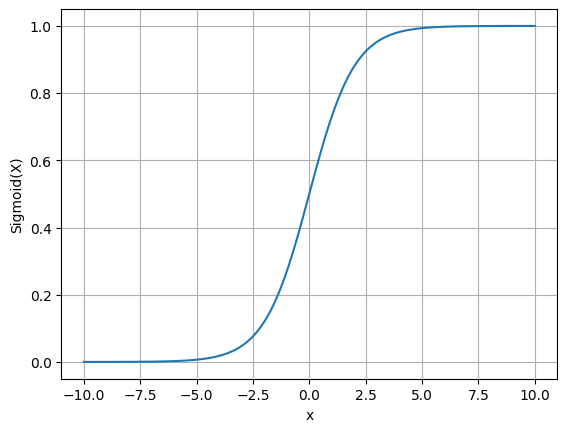

In [ ]:
x = np.linspace(-10, 10, 100) # 100 equidistant points between -10 and 10
y = sigmoid(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

Observe,

- The curve of sigmoid looks exactly like an S shape curve with cutting the y axis for x=0, at y=0.5


Now that we have the sigmoid function, what loss function should we use?


**Quiz 9** (Check your understanding)

```
A company is building a credit scoring model to predict risk of default.
Which function can be used to map the model's output to a probability between 0 and 1?
A) Sigmoid function.
B) Linear function.
C) Step function.
D) Exponential function.
Correct Answer: A) Sigmoid function.
```


The output of sigmoid function can be thought of as a probability of a point belonging to class 1

$\hat{y}^{(i)}=P(y^i=1|x^i)$

E.g.
=> If we get sigmoid value as 0.18, it means there's a 18% chance the point belongs to class 1


There is one issue though with sigmoid function.

#### What is a problem with sigmoid function being used for classification?


We are getting continuous values in the range of {0,1}

Can you suggest a way to convert this to categorical values?

#### **Thresholding**

We can take a threshold of 0.5

So values >= 0.5 will be 1, else 0


## Geometric Interpretation of Sigmoid


![image](./extra/lr6.jpg)


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/536/original/Log_Reg_1.png?1692615847' width=800>


**Conclusion:**

- Closer the point is to hyperplane,

  - more unsure we are with its probability of it belonging to a specific class

- Farther it is from hyperplane,
  - more confident we are of it belonging to specific class.


**Quiz 11** (Check your understanding)

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/478/original/image_2023-06-09_145616657.png?1686302778)

```
Which point will have a higher probability of belonging to class 1?

A. x1
B. x2

Ans: x1
```

Explanation:

- x1 is nearer to the line, while x2 is farther, on the negavtive side.
- Hence x2 will have a higher chance of belonging to class 0,
- which conversely means it will have a lower chance than x1 to belong to the class 1


## **Maximum Log-likelihood**


![image](./extra/lr7.jpg)


#### <font color='green' >(Optional)</font> Difference between likelihood and probability ?


Let's try to understand the difference between likelihood and probability

Say, we plot the distribution of data of **students scores in module test**

- x axis is the marks and y axis the frequency (or density as in a kde plot)

Our task is to find the **probability** of a student's score lying in the range of 60 to 70


![image](./extra/lr8.jpg)


The probability can be said as

- the area under the distribution curve for the range of 60 and 70
- in this case it would be 0.29, or 29%

The notation would be

- $pr(data|distribution)$


![image](./extra/lr9.jpg)


#### What about likelihood?

Say we want to find the likelihood of a student getting 63 marks?


![image](./extra/lr10.jpg)


That would simply be the value on the y-axis for the distribution, in this cae, 0.12

The notation would be

- $L(dist.|data)$


So what's the major difference?

- In likelihood the data is fixed, we move the distribution to fit the data.
- In probability, we change the data as per our requirement.

On a simpler terms,

- Probability refers to the possibility of something happening
- While likelihood refers to determining the data distribution for a given data point


#### So how is this conneted to MLE in logistic regression?

- Likelihood function determines the distribution given some observed data
- In logistic regression, we are given the observed data for which we are trying to find the parameters to
- MLE maximizes the likelihood of the likelihood function to be able to estimate the parameters of the observed data


<!-- **Assume** we toss a fair coin.

**What'll be the probability of getting a heads?**
=> 1/2 or 0.5

**What'll be the probability of getting a tails?**
- Same. 0.5

Notice that
- when calculating probability or how likely a specific outcome will occur
- we started off with an assumed condition

The condition in this case was **fair coin** -->


<!--
Now take **another example**:

Say, we tossed a coin 10 times.
- Out of 10 we got 8 heads and 2 tails.

based on this, we want to know whether it is a fair coin or biased coin.

Notice that
- this time there is **no assumption** whether we have fair coin or baised coin
- and we are provided with observed data (coin tossed 10 times.)

Based on this, we get the **likelihood**
- i.e. get the plausibility of hypothesis based on observed data.

It is basically reverse engineering.
- Instead of giving us a assumption,
    - we are given a data and have been asked to whether the assumption will hold for this data.
    - This is where we calculate the likelihood of it.


 -->


<!--
**So, why likelihood when performing MLE?**

In logistic regression, We are trying to **find the parameters** of a model based on **observed data**


- and likelihood tells us plausibility of how well the chosen parameters explain the observed data. -->


### Maximizing Likelihood Estimation


![image](./extra/lr11.jpg)


We can write the above as:


![image](./extra/lr12.jpg)


We plot the error vs prediction plot for $y^{(i)}=0$ and $y^{(i)}=1$


![image](./extra/lr13.jpg)


Notice, this is the same as our negative log likelihood we dervied earlier


### Why can't we use MSE as loss for classification?


Before we dive into this, let's look at convex and non convex fuction


![image](./extra/lr14.jpg)


#### What function would you prefer when solving for optimization problem of logisitic regression ?


![image](./extra/lr15.jpg)


**But, if we choose MSE with sigmoid, it'll be a non convex function.**

- and we may not reach optimal solution.


#### But, we use MSE for linear regression. It was giving optimal solution. Why didn't we face this issue over there?

Yes. Pay attention

- **MSE when used with sigmoid as predictor** turns out to be non convex.

We didn't use sigmoid as predictor in linear regression. Hence, it was convex over there


#### Why MSE used with sigmoid is non convex?

There's a mathematical proof behind it. If you are interested, you can read more here: https://towardsdatascience.com/why-not-mse-as-a-loss-function-for-logistic-regression-589816b5e03c


Hence, **we choose logloss with sigmoid**

- which is a convex function

and gurantees that we reach optimal solution.


### Let's implement log-loss now


In [ ]:
# Loss for a single point
def log_loss(y, y_hat):
  loss = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -loss

**Quiz 12 :** (What do you think?)

```
What do you think would be the change to the code to implement it for m-points?
A. -np.mean(loss)
B. -loss/m, m being number of points
C. -np.sum(loss)

Ans: -np.mean(loss)
```


In [ ]:
# Case 1, yi=1, high pi
log_loss(1, 0.99)

0.01005033585350145

Observe, how small log loss is


In [ ]:
# Case 2, yi = 1, pi =0.5

log_loss(1, 0.5)

0.6931471805599453

In [ ]:
# Case 3, yi = 1, low pi

log_loss(1, 0.1)

2.3025850929940455

Observe, how high the log loss is


**QUIZ 13** (Check your knowledge)

```
Supposedly your y = 0 and ŷ = 0.01 , so what be the log-loss ?

A. log-loss will be a very high value

B. log-loss will be a very low value

C. log-loss will be 0
```

**Answer**

B. log-loss will be a very low value

Explanation: This is similar to log_loss(1,0.99)


<font color='red'>Post read</font>

https://drive.google.com/open?id=1PRVjE8xHnITWmp5gTh3cQkQV2fBoSWAd&usp=drive_copy


## Optimization


#### Do we need regularization?

Yes, we can add regularization to prevent overfitting of the model


![image](./extra/lr16.jpg)


<img src='https://drive.google.com/uc?id=1ZsqxNTRqoNWS2pxLiHIe38k_d6B-dWQC' width=800>


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/547/original/Log_Reg_1_%281%29.png?1692621251' width=800>


<img src='https://drive.google.com/uc?id=1Uc163cZsh-uzGPfke9Fmx75Cafob1Dgb' width=800>


![image](./extra/lr17.jpg)


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/537/original/log2.png?1692615977' width=800>


<font color='red'> The scratch implementation of LogisticRegression is in the PostRead. </font>

- https://colab.research.google.com/drive/16OjEQ0RExT7AlgyasMlvyvdCt0TNB18m?usp=share_link


Extra Quizzes: (Check your understanding)

**Quiz 14**

```
Which function is commonly used as an activation function in logistic regression?
a) ReLU
b) Sigmoid (Answer)
c) Tanh
d) Softmax
```

**Quiz 15**

```
In logistic regression, the output of the sigmoid function is interpreted as:
a) Class probabilities (Answer)
b) Raw scores
c) Error rates
d) Regression coefficients
```

**Quiz 16**

```
The sigmoid function maps its input to a range between:
a) -1 and 1
b) 0 and 1 (Answer)
c) -∞ and ∞
d) 0 and ∞
```

**Quiz 17**

```
In logistic regression, the cost function used is:
a) Mean Squared Error (MSE)
b) Mean Absolute Error (MAE)
c) Log-Loss (Answer)
```

**Quiz 18**

```
Which of the following is a characteristic of sigmoid activation function?
a) Linear activation
b) Non-linear activation
c) Step-wise activation
d) Exponential activation
Answer: b) Non-linear activation
```

**Quiz 19**

```
Which of the following is true about k-fold cross-validation?
a) Each fold serves as both training and testing data atleast once
b) Each fold serves as only training data and never as testing data
c) Each fold serves as only testing data and never as training data
d) The model is trained on the first fold and tested on the remaining folds
Answer: a) Each fold serves as both training and testing data atleast once


```

**Quiz 20**

```
Which of the following is a drawback of k-fold cross-validation?
a) It requires more computational resources compared to the holdout method
b) It can lead to overfitting if the model is not properly regularized
c) It is less accurate than traditional train-test splits
d) It does not require hyperparameter tuning
Answer: b) It can lead to overfitting if the model is not properly regularized

Explanation:
- If the model is complex and not properly regularized,
it can potentially overfit the training data for each fold.
```

**Quiz 21**

```
Which statement about the step function is true?
a) It is continuous and differentiable
b) It is continuous but not differentiable
c) It is neither continuous nor differentiable
d) It is differentiable but not continuous
Answer: c) It is neither continuous nor differentiable
```


## Sklearn Implementation of Logistic regression


Let's load the data of our business case now


In [ ]:
#Churn prediction in telecom.
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 31.8MB/s]


In [ ]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


We will choose 5 features for our logistic regression which we selected using simple EDA

You can go through the EDA of this to understand how we selected these features:

https://colab.research.google.com/drive/1nkbiGCMrevDzdSG9yN5bXaxeC8CPJSQg?usp=sharing


In [ ]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
X = churn[cols]
X.shape

(5700, 5)

Let's split the data into training, validation and testing


In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape

(3420, 5)

We will scale our data before fitting the model


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.8525591 , -0.54121117,  1.87596728,  0.0724823 ,  2.13378709],
       [ 0.93155078,  1.05292599,  0.39854651, -0.54879454, -0.81991418],
       [ 0.46912157,  0.11462924,  1.13324217,  0.0724823 , -2.27130187],
       ...,
       [-0.52565742, -0.04014136, -0.68543069,  0.69375914,  0.55508469],
       [-0.94359172, -0.58957698, -0.37428909,  1.93631281, -0.36158122],
       [-0.58604336,  2.40910335,  1.70935597,  0.69375914, -0.25972945]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[0.6844725 , 0.29104522, 0.13637423, 0.79640697, 0.0613349 ]])

In [ ]:
model.intercept_

array([-0.01215015])

In [ ]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 1, 1])

## Accuracy Metric


<img src='https://drive.google.com/uc?id=1idIjt8sYlFbBdGy0udJz_NdAMeX_BAf9' width=800>

'https://drive.google.com/uc?id=1idIjt8sYlFbBdGy0udJz_NdAMeX_BAf9',
'https://drive.google.com/uc?id=15_a3vpK24gFOY4BJHaFovUxMQ9nVWuNd'


<img src='https://drive.google.com/uc?id=15_a3vpK24gFOY4BJHaFovUxMQ9nVWuNd' width=800>


Let's implement our accuracy metric now


In [ ]:
def accuracy(y_true, y_pred):
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [ ]:
accuracy(y_train, model.predict(X_train))

0.7058479532163743

In [ ]:
accuracy(y_val, model.predict(X_val))

0.6982456140350877

So our model has a validation accuracy of 0.71, or 71.49%


**Quiz** (What do you think?)

```
What is the main risk of overfitting when tuning hyperparameters in logistic regression?
a) The model may generalize well to unseen data but poorly on the training data
b) The model may perform well on the training data but poorly on unseen data
c) The model may underperform compared to a model with default hyperparameter values
d) The model may be too simple and fail to capture complex relationships in the data

Answer: b) The model may perform well on the training data but poorly on unseen data


Explanation:
 Overfitting occurs when a model is excessively tuned to the training data and fails to generalize well to unseen data.
```
